# Perceptron
# $y = 1, if \sum_i w_i x_i >= b $


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
data = pd.read_csv("data.csv")

In [27]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [28]:
data.set_index('id',inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
data.drop('Unnamed: 32',axis = 1, inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
data['diagnosis'] = data['diagnosis'].map(lambda x:1 if x=='M' else 0)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
X = data.drop('diagnosis',axis = 1)
Y = data['diagnosis']

In [32]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
%%timeit
Y.head()

62.3 µs ± 1.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1, stratify = Y, random_state = 6)

In [35]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (512, 30) (57, 30)


In [36]:
print(Y.shape,Y_train.shape,Y_test.shape)

(569,) (512,) (57,)


In [37]:
class Perceptron:
    def __init__(self):
        self.w = None
        self.b = None
        
    def Model(self, x):
        return 1 if (np.dot(self.w,x) >= self.b) else 0
    
    def Predict(self,X):
        Y_predicted = []
        for x in X:
            result = self.Model(x)
            Y_predicted.append(result)
        return np.array(Y_predicted)
    
    def Fit(self,X,Y,epochs = 10, lr = 1):
        self.w = np.ones(X.shape[1])
        self.b = 0   
        accuracy = {}
        max_accuracy = 0
        iteration = 0
        for i in range(epochs):
            for x,y in zip(X,Y):
                y_pred = self.Model(x)
                if (y == 0 and y_pred == 1):
                    self.w = self.w - (lr*x)
                    self.b = self.b + (lr*1)
                elif(y == 1 and y_pred == 0):
                    self.w = self.w + (lr*x)
                    self.b = self.b - (lr*1)
                accuracy[i] = accuracy_score(self.Predict(X),Y)
                if accuracy[i] > max_accuracy :
                    max_accuracy = accuracy[i]
                    iteration = i+1
                    best_w = self.w
                    best_b = self.b

            #print("At iteration -",i, " Accuracy = ",accuracy_score(self.Predict(X),Y))
        self.w = best_w
        self.b = best_b
        print("Maximaum accuracy is - ",max_accuracy," at iteration - ",iteration)
        plt.figure(figsize = (10,8))
        plt.plot(accuracy.values())
        plt.ylim(0,1)
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy Score")
        plt.show()

In [38]:
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

Maximaum accuracy is -  0.919921875  at iteration -  5


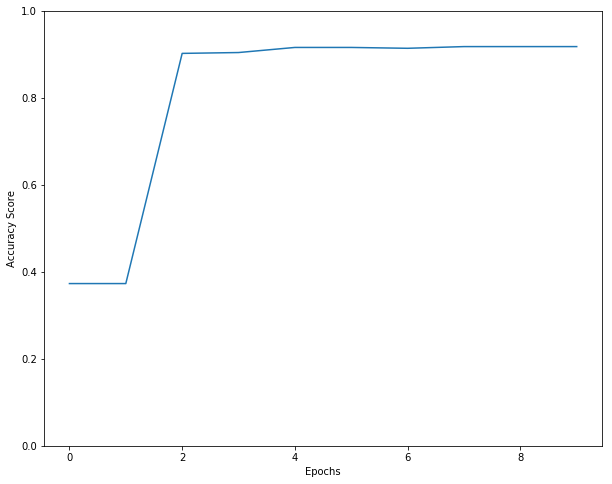

In [39]:
per = Perceptron()
per.Fit(X_train,Y_train)

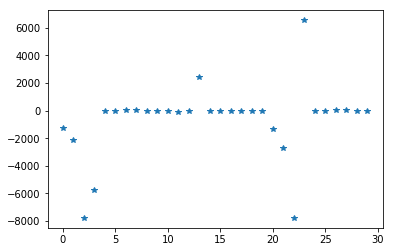

In [40]:
plt.plot(per.w,'*')
plt.show()

In [41]:
per.b

164

Maximaum accuracy is -  0.9375  at iteration -  686


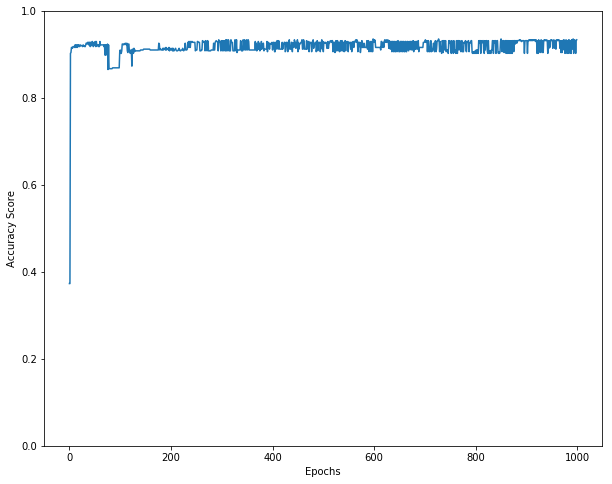

In [42]:
#adding the epochs
per = Perceptron()
per.Fit(X_train,Y_train,1000)

Maximaum accuracy is -  0.919921875  at iteration -  5


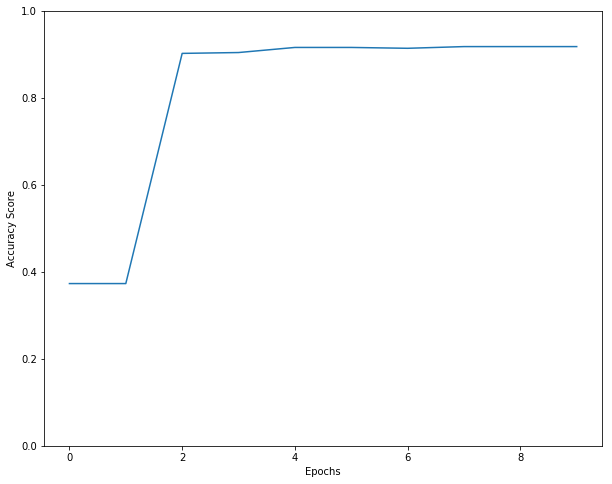

In [48]:
#LR = 1
per = Perceptron()
per.Fit(X_train,Y_train,10)

Maximaum accuracy is -  0.91796875  at iteration -  7


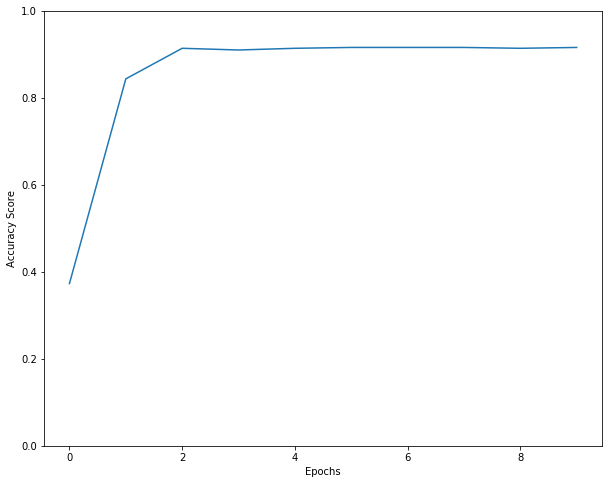

In [49]:
#LR = 0.1
per = Perceptron()
per.Fit(X_train,Y_train,10,0.1)

Maximaum accuracy is -  0.9296875  at iteration -  31


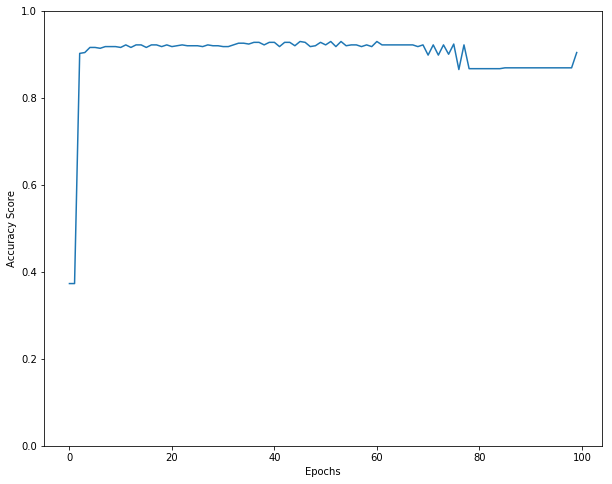

In [50]:
#LR = 1
per = Perceptron()
per.Fit(X_train,Y_train,100,1)

Maximaum accuracy is -  0.931640625  at iteration -  92


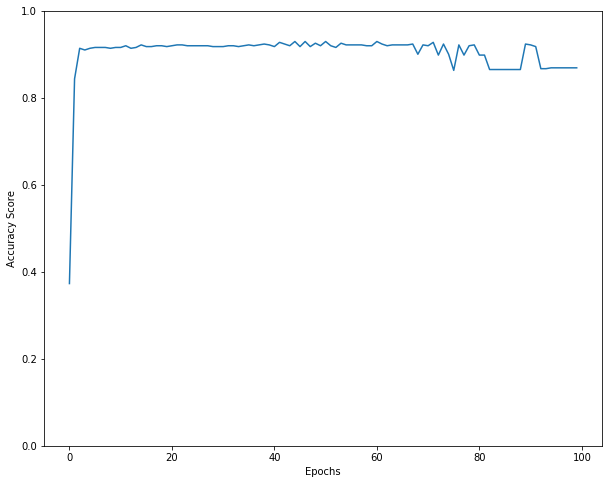

In [51]:
#LR = 0.1
per = Perceptron()
per.Fit(X_train,Y_train,100,0.1)

In [52]:
Y_pred_test = per.Predict(X_test)
accuracy = accuracy_score(Y_pred_test,Y_test)
print(accuracy)

0.9298245614035088
